In [ ]:
!pip install aeon

In [ ]:
"""
Uses pandas==1.4.0
"""

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

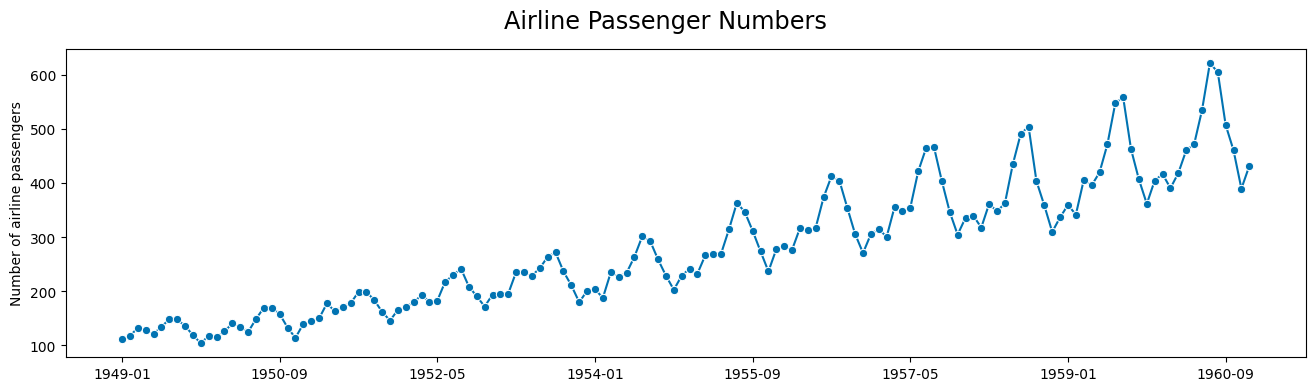

In [29]:
"""
Visualizing Time Series with Aeon
Aeon includes plotting utilities for exploratory data analysis.
Basic Line Plot
"""

from aeon.datasets import load_airline
from aeon.visualisation  import plot_series
%matplotlib inline

# Airline passenger dataset
y = load_airline()

plot_series(y, title="Airline Passenger Numbers")

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='TOTEMP'>)

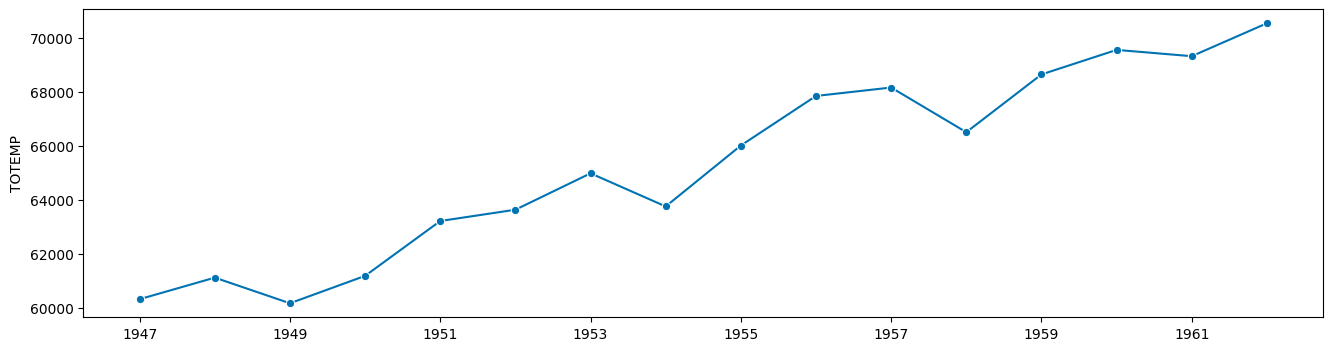

In [18]:

from aeon.datasets import load_longley
from aeon.visualisation import plot_series
# Load multivariate dataset
X, y = load_longley()
# Plot multiple series
plot_series(X)


In [ ]:
"""
Time Series Classification with Aeon
Aeon provides a wide range of classifiers for time series data.
Example: Classify Synthetic Data
"""
from aeon.datasets import make_example_dataset
from aeon.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from aeon.plotting import plot_series
# Generate synthetic data
X, y = make_example_dataset(n_samples=100, n_timepoints=50, random_state=42)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train a classifier
clf = TimeSeriesForestClassifier()
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

---

6. Time Series Regression with Aeon
Predict continuous values using regression models.
Example: Time Series Regression
from aeon.datasets import load_longley
from aeon.regression.interval_based import TimeSeriesForestRegressor
# Load the dataset
X, y = load_longley()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a regression model
regressor = TimeSeriesForestRegressor()
regressor.fit(X_train, y_train)
# Evaluate the model
y_pred = regressor.predict(X_test)
print(f"R^2 Score: {regressor.score(X_test, y_test):.2f}")

---

7. Time Series Clustering
Group similar time series using clustering algorithms.
Example: K-Means Clustering
from aeon.clustering import TimeSeriesKMeans
from aeon.plotting import plot_series
# Generate synthetic data
X, _ = make_example_dataset(n_samples=50, n_timepoints=30, random_state=42)
# Apply K-Means clustering
kmeans = TimeSeriesKMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
# Visualize clusters
for cluster in range(3):
    plot_series(*[X[i] for i in range(len(X)) if labels[i] == cluster], title=f"Cluster {cluster + 1}")

---

8. Transformations with Aeon
Transform time series data for analysis or modeling.
Example: Time Series Scaling
from aeon.transformations.series.scaling import Scaler
# Apply scaling transformation
scaler = Scaler()
y_scaled = scaler.fit_transform(y)
# Plot original vs scaled
plot_series(y, y_scaled, labels=["Original", "Scaled"])

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='TOTEMP'>)

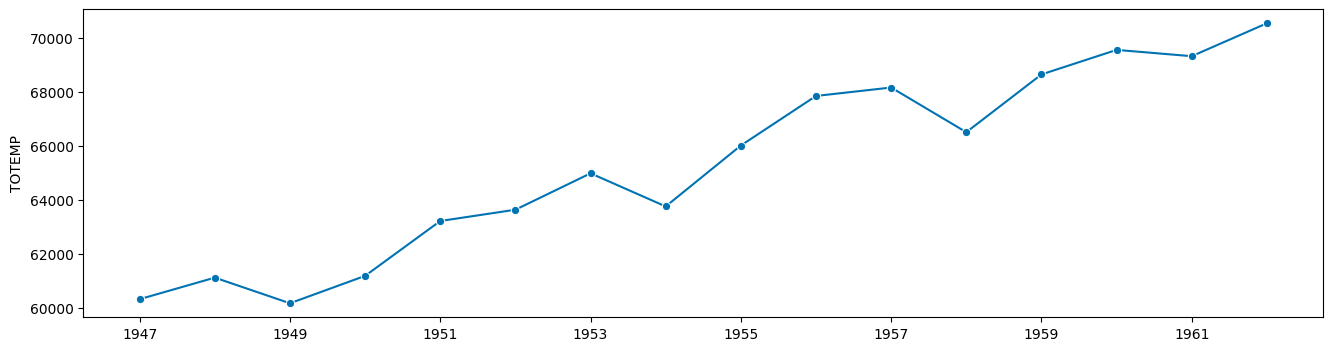

In [25]:
from aeon.datasets import load_longley
from aeon.visualisation import plot_series

# Load multivariate dataset
X, y = load_longley()

# Plot multiple series
plot_series(X)


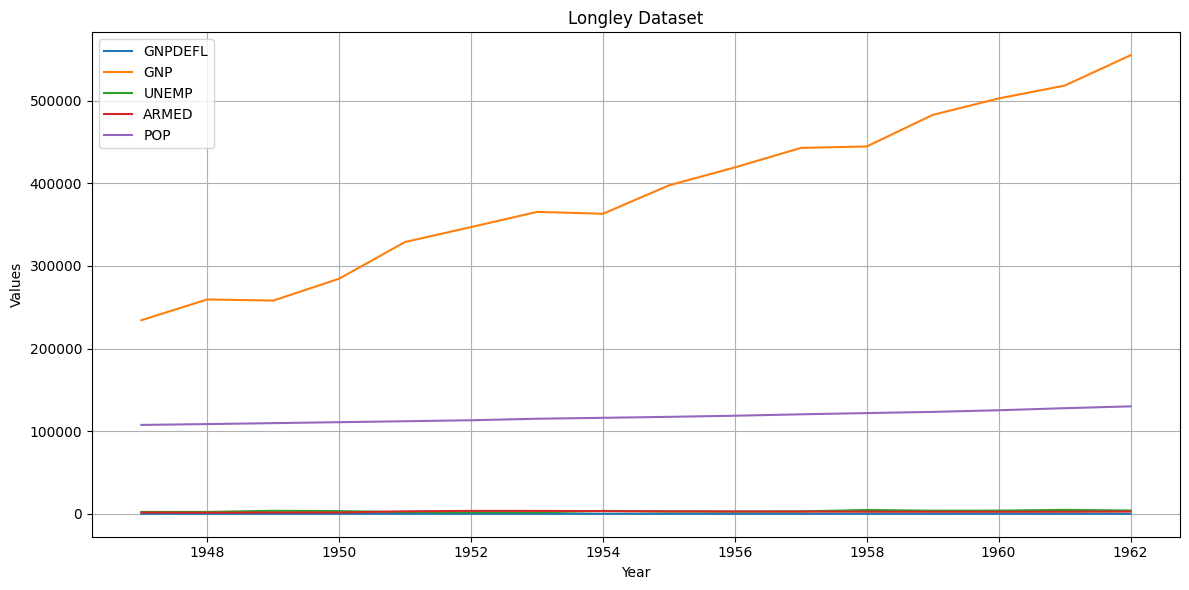

In [30]:
import matplotlib.pyplot as plt
from aeon.datasets import load_longley
import pandas as pd

# Load multivariate dataset
X, y = load_longley()

# Convert Period index to datetime
X.index = X.index.to_timestamp()
y.index = y.index.to_timestamp()

# Create the plot
plt.figure(figsize=(12, 6))

for column in y.columns:
    plt.plot(y.index, y[column], label=column)

plt.title("Longley Dataset")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.to_DateFrame(load_longley())

In [40]:
"""
Time Series Regression with Aeon
Predict continuous values using regression models.
Example: Time Series Regression
"""
from aeon.datasets import load_longley
from aeon.regression.interval_based import TimeSeriesForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Load the Longley dataset
X, y = load_longley()

# Convert X to a DataFrame with a single column
X = pd.DataFrame(X)

# Reshape X to be 3D (samples, time steps, features)
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# Convert y to a 1D numpy array
y = y.iloc[:, 0].values  # Using the first column of y as the target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a regressor
reg = TimeSeriesForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")


R-squared Score: 0.95


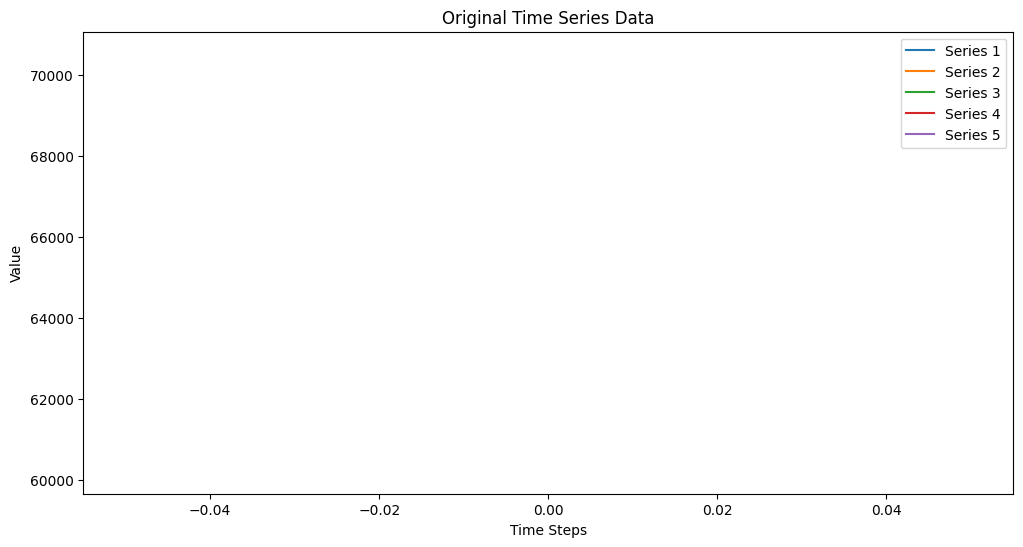

R-squared Score: 0.95


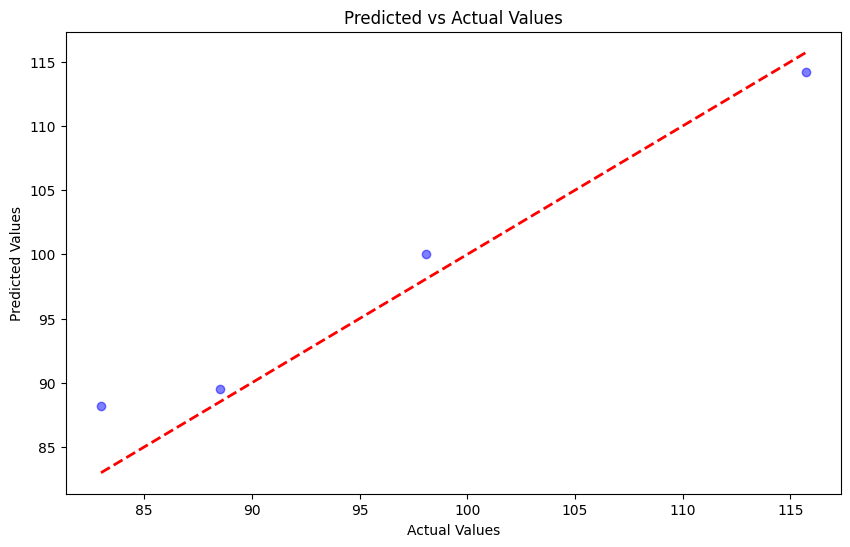

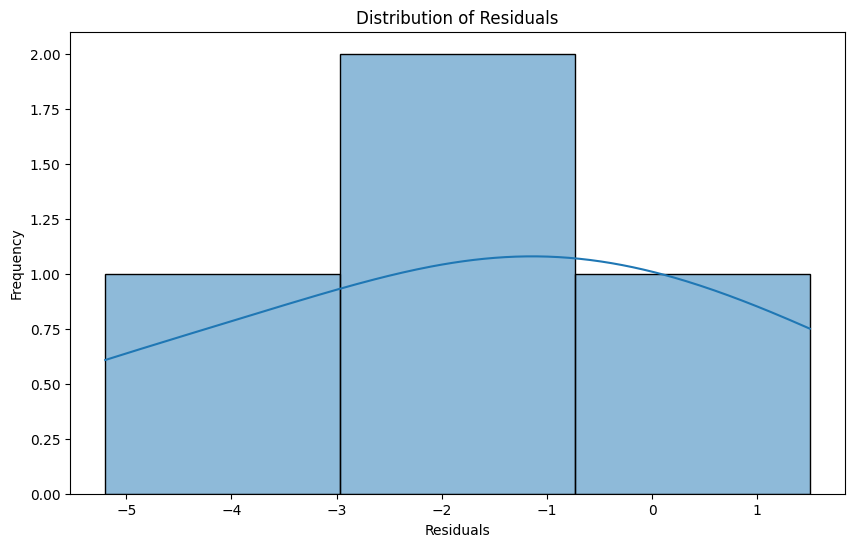

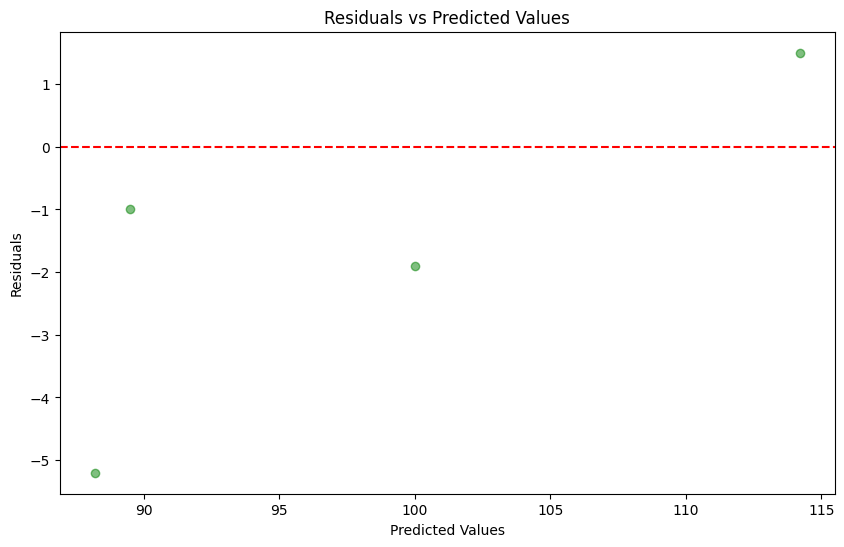

In [41]:
"""
Time Series Regression with Aeon
Predict continuous values using regression models.
Example: Time Series Regression with Visualizations
"""
from aeon.datasets import load_longley
from aeon.regression.interval_based import TimeSeriesForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Longley dataset
X, y = load_longley()

# Convert X to a DataFrame with a single column
X = pd.DataFrame(X)

# Reshape X to be 3D (samples, time steps, features)
X = X.values.reshape((X.shape[0], X.shape[1], 1))

# Convert y to a 1D numpy array
y = y.iloc[:, 0].values  # Using the first column of y as the target

# Visualize the original time series data
plt.figure(figsize=(12, 6))
for i in range(X.shape[0]):
    plt.plot(X[i, :, 0], label=f'Series {i+1}' if i < 5 else '')
plt.title('Original Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a regressor
reg = TimeSeriesForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Visualize residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


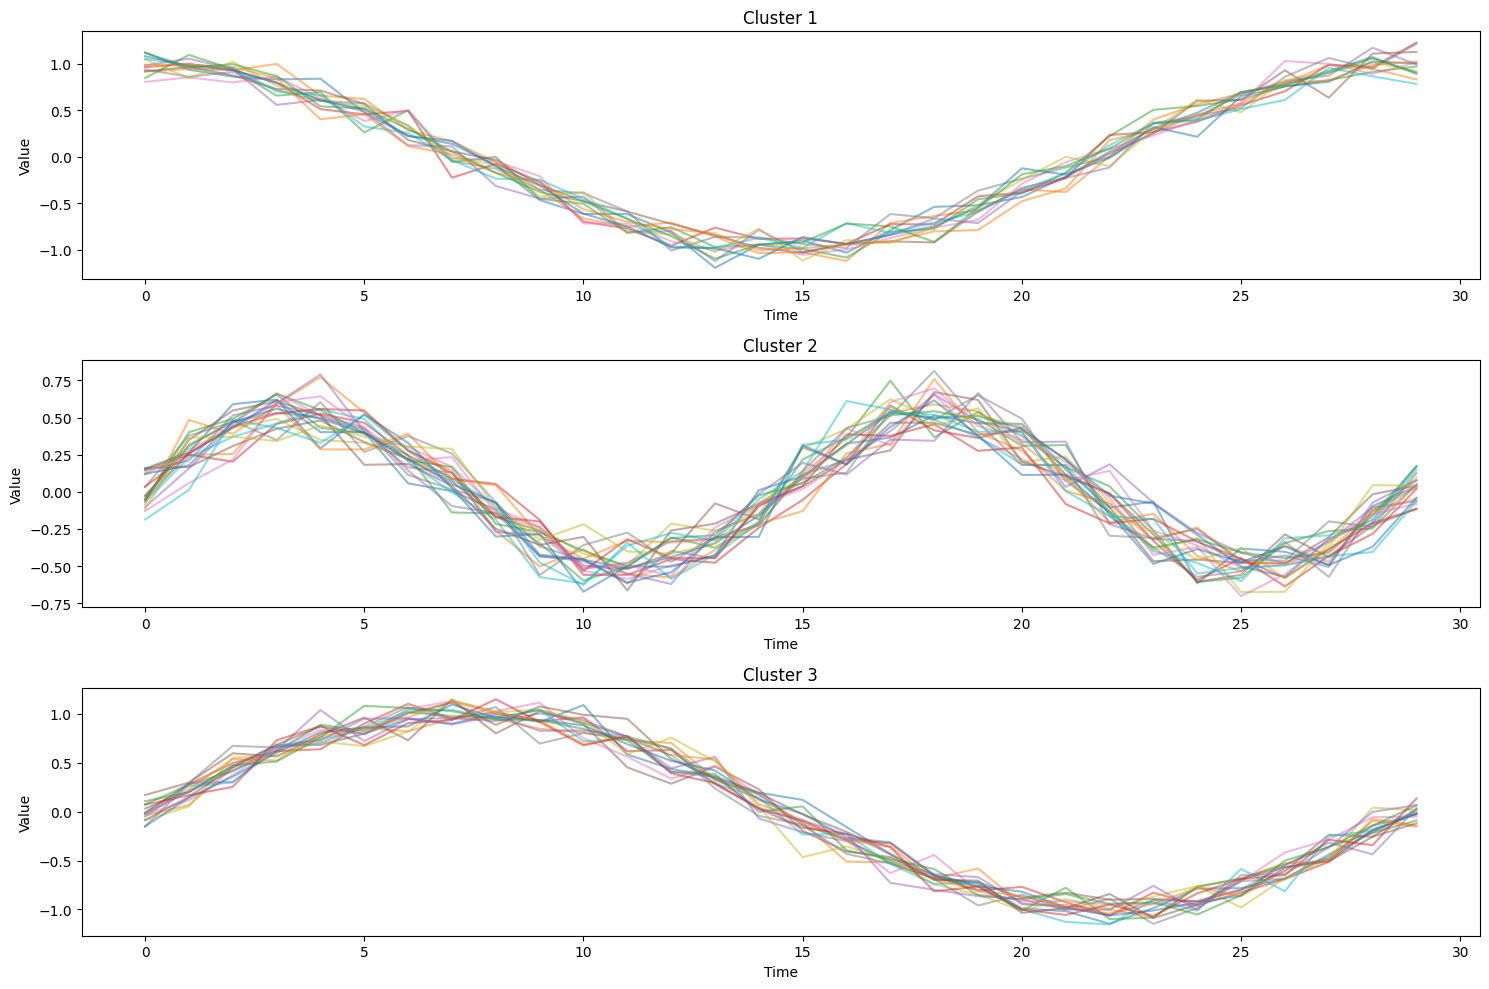

Shape of X: (50, 30)
Shape of labels: (50,)


In [36]:
"""
Time Series Clustering
Group similar time series using clustering algorithms.
Example: K-Means Clustering
"""

import numpy as np
import matplotlib.pyplot as plt
from aeon.clustering import TimeSeriesKMeans

def make_example_dataset(n_samples=50, n_timepoints=30, random_state=42):
    np.random.seed(random_state)
    
    t = np.linspace(0, 2*np.pi, n_timepoints)
    patterns = [
        lambda: np.sin(t),
        lambda: np.cos(t),
        lambda: 0.5 * np.sin(2*t)
    ]
    
    X = []
    for _ in range(n_samples):
        pattern_func = np.random.choice(patterns)
        series = pattern_func() + np.random.normal(0, 0.1, n_timepoints)
        X.append(series)
    
    return np.array(X)

# Generate synthetic data
X = make_example_dataset(n_samples=50, n_timepoints=30, random_state=42)

# Apply K-Means clustering
kmeans = TimeSeriesKMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize clusters (optional)
plt.figure(figsize=(15, 10))
for cluster in range(3):
    plt.subplot(3, 1, cluster+1)
    cluster_series = [X[i] for i in range(len(X)) if labels[i] == cluster]
    for series in cluster_series:
        plt.plot(series, alpha=0.5)
    plt.title(f"Cluster {cluster + 1}")
    plt.xlabel("Time")
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

# Print shapes to verify
print(f"Shape of X: {X.shape}")
print(f"Shape of labels: {labels.shape}")


In [37]:
from aeon.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize and train a classifier
clf = TimeSeriesForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Print some information about the data
print(f"\nData shape: {X.shape}")
print(f"Number of classes: {len(np.unique(labels))}")
print(f"Class distribution: {np.bincount(labels)}")

Accuracy: 1.00

Data shape: (50, 30)
Number of classes: 3
Class distribution: [13 21 16]


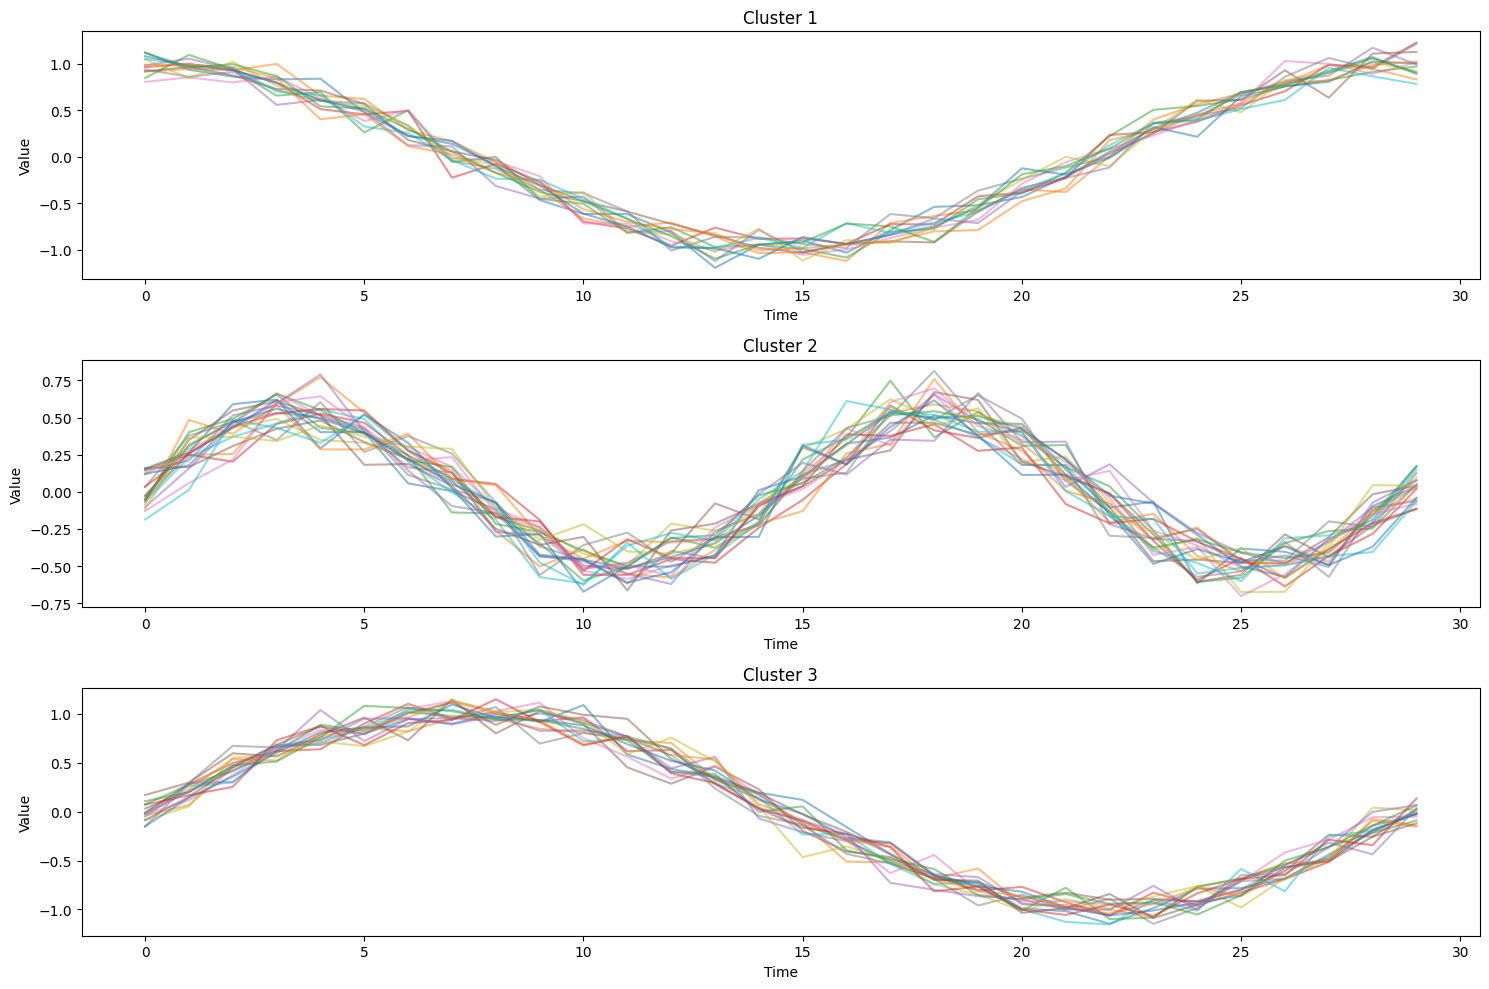

Shape of X: (50, 30)
Shape of labels: (50,)
Accuracy: 1.00

Data shape: (50, 30)
Number of classes: 3
Class distribution: [13 21 16]


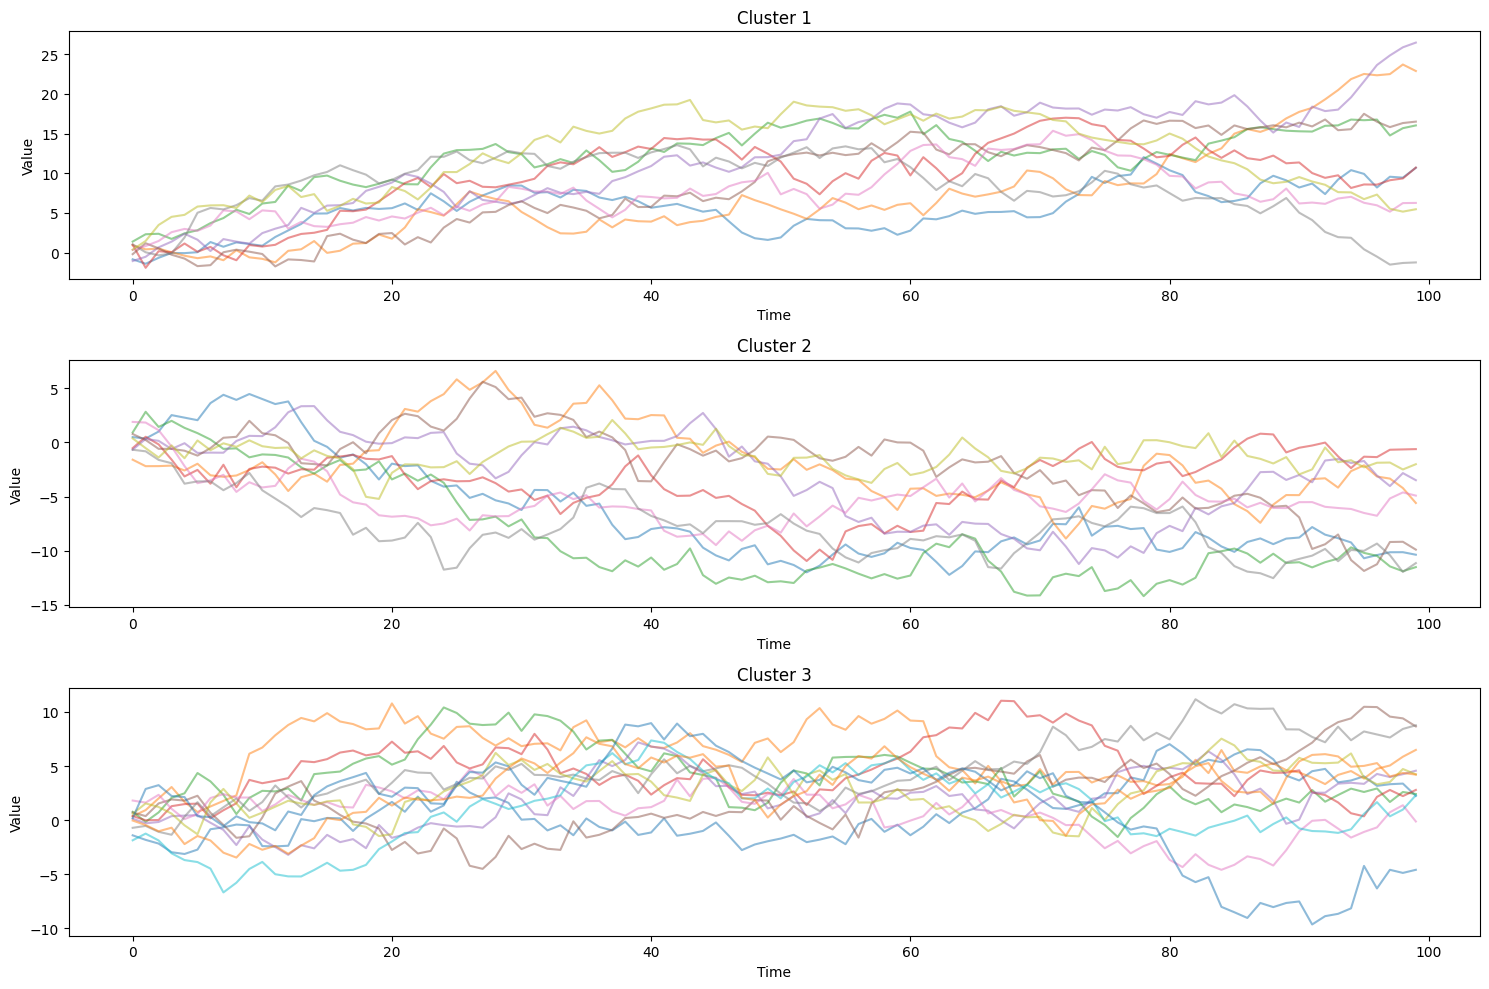

Accuracy: 1.00

Data shape: (30, 100)
Number of classes: 3
Class distribution: [ 9  9 12]


In [38]:
"""
Noisier data
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aeon.clustering import TimeSeriesKMeans

# Generate synthetic data
np.random.seed(42)
n_series = 30
n_timepoints = 100

# Create multiple time series
X = np.array([np.cumsum(np.random.randn(n_timepoints)) for _ in range(n_series)])

# Apply K-Means clustering
kmeans = TimeSeriesKMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(15, 10))
for cluster in range(3):
    plt.subplot(3, 1, cluster + 1)
    cluster_series = [X[i] for i in range(len(X)) if labels[i] == cluster]
    for series in cluster_series:
        plt.plot(series, alpha=0.5)
    plt.title(f"Cluster {cluster + 1}")
    plt.xlabel("Time")
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

from aeon.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Initialize and train a classifier
clf = TimeSeriesForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Print some information about the data
print(f"\nData shape: {X.shape}")
print(f"Number of classes: {len(np.unique(labels))}")
print(f"Class distribution: {np.bincount(labels)}")

In [43]:
from aeon.datasets import load_gun_point_segmentation
X, period_length, change_points = load_gun_point_segmentation()

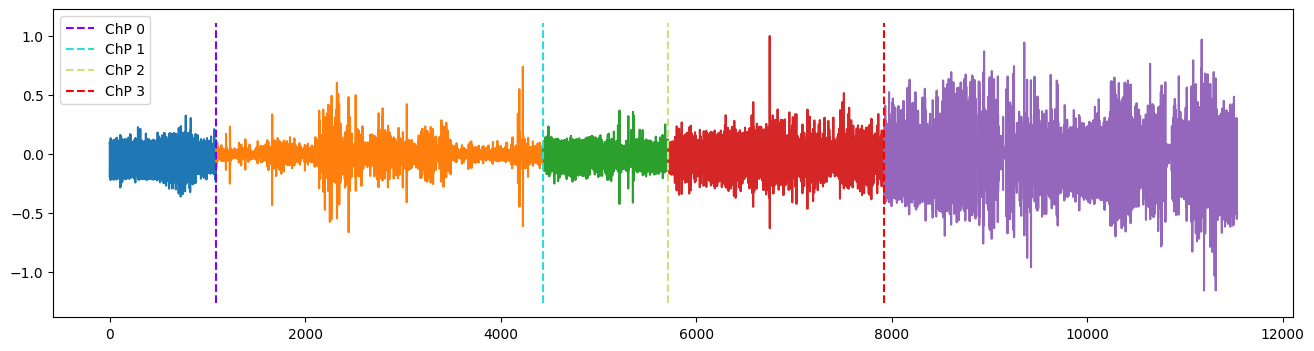

In [46]:
from aeon.datasets import load_airline, load_electric_devices_segmentation


ed_seg, _, ed_seg_chp = load_electric_devices_segmentation()
_ = plot_series_with_change_points(ed_seg, ed_seg_chp)

In [47]:
from aeon.forecasting import ETSForecaster
from aeon.datasets import load_airline
y = load_airline()
forecaster = ETSForecaster(alpha=0.4, beta=0.2, gamma=0.5, phi=0.8, horizon=1)
forecaster.fit(y)

forecaster.predict()


ImportError: cannot import name 'ETSForecaster' from 'aeon.forecasting' (/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/aeon/forecasting/__init__.py)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from aeon.forecasting import ETSForecaster
from aeon.datasets import load_airline

# Load the airline passengers dataset
y = load_airline()

# Split the data into train and test sets
train = y[:-12]  # Use all but the last 12 months for training
test = y[-12:]   # Use the last 12 months for testing

# Create and fit the ETSForecaster
forecaster = ETSForecaster(seasonal="add", sp=12)  # sp=12 for monthly data
forecaster.fit(train)

# Make predictions
fh = np.arange(1, 13)  # Forecast horizon: next 12 months
y_pred = forecaster.predict(fh)

# Plot the results
plt.figure(figsize=(12, 6))
train.plot(label='Training Data', color='blue')
test.plot(label='Test Data', color='green')
y_pred.plot(label='Forecast', color='red')
plt.title('Airline Passengers Forecast using ETSForecaster')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Print forecast values
print("Forecast values:")
print(y_pred)

# Calculate Mean Absolute Error
from aeon.performance_metrics.forecasting import mean_absolute_error
mae = mean_absolute_error(test, y_pred)
print(f"\nMean Absolute Error: {mae:.2f}")


ImportError: cannot import name 'ETSForecaster' from 'aeon.forecasting' (/Users/jnesnky/opt/anaconda3/lib/python3.8/site-packages/aeon/forecasting/__init__.py)